# Reducing Employee Turnover

Its essential for companies to collect and use their data to help build a competitive advantage.  It is important for companies to take actions to minimize attriction, increase employee quality of life, and maintain the best professionals within the company. In this project, we will go over key features to help reduce companies turnover and build that competitive edge.

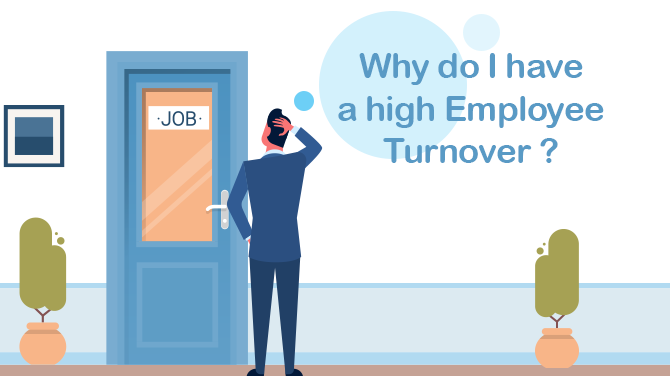

Data being used is coming from Kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

!pip install -q scikit-plot

In [2]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# importing Machine Learning resources
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Read in the Data

### About the Dataset

#### Education

- 1 'Below College'
- 2 'College'
- 3 'Bachelor'
- 4 'Master'
- 5 'Doctor'

##### Environment Satisfaction

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

#### Job Involvement

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

#### Job Satisfaction

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

#### Performance Rating

- 1 'Low'
- 2 'Good'
- 3 'Excellent'
- 4 'Outstanding'

#### Relationship Satisfaction

- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

#### Work Life Balance

- 1 'Bad'
- 2 'Good'
- 3 'Better'
- 4 'Best'

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Check for missing values

In [4]:
df.info()
print("\n The Dataset Doesn't Have Missing Values. \n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Statistical distribution of each variable

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Initial insights from the data above

- There are no missing values
- The average age across the dataset is nearly 37 years old.
- The average for an employee to stay within the company is 7 years.
- The average monthly income for an employee is $6502

### Statistical Distribution for the Categorical Data

In [6]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Insights from the Categorical Data

- Most employees haven't left the company
- Research & Development presents the greatest number of employees
- Male employees are the top contributor in the company

## Gender Equality

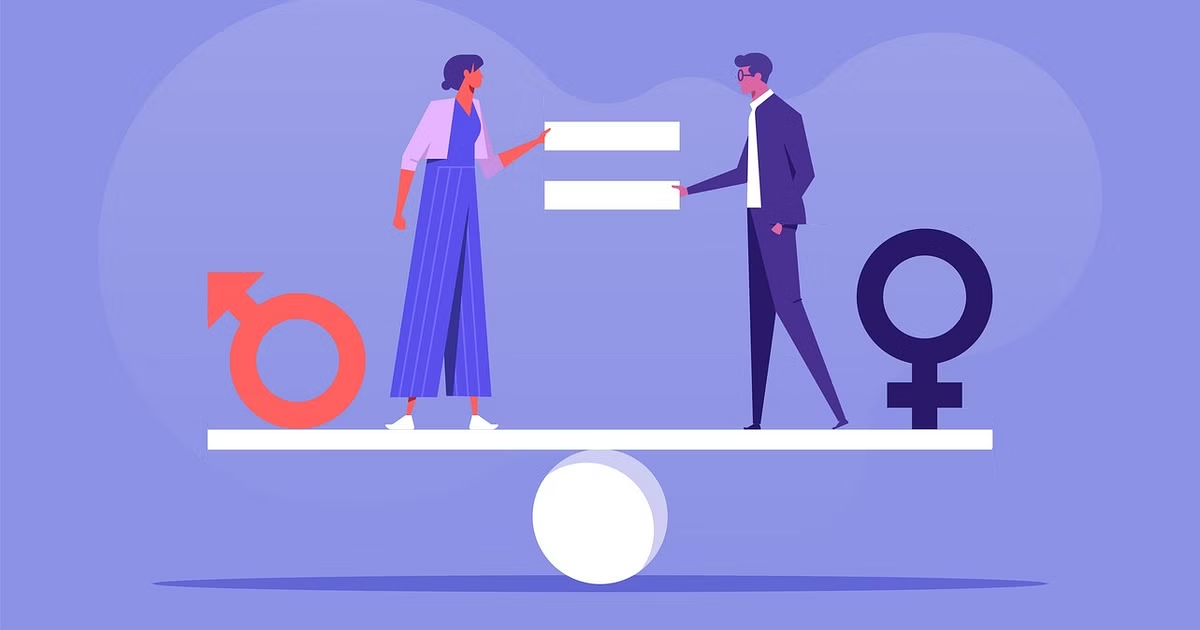

Gender equality is the state of equal access to opportunities and resources for all people, regardless of gender.  Companies need to take efforts into gender equality.  

Lets take a look at how gender equality across the company.

In [7]:
df.groupby(['Gender']).Education.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,2.933673,1.007986,1.0,2.0,3.0,4.0,5.0
Male,882.0,2.899093,1.035148,1.0,2.0,3.0,4.0,5.0


In [8]:
df.groupby(['Gender']).Education.value_counts(ascending=False)

Gender  Education
Female  3            235
        4            154
        2            117
        1             60
        5             22
Male    3            337
        4            244
        2            165
        1            110
        5             26
Name: Education, dtype: int64

### Gender Summary

- The company pays more for an individual whom are female rather than males, except for the top percentage

### Convert Target Variable to Numerical Value

In [9]:
target_map = {'Yes':1, 'No':0}

df['Attrition_targ'] = df["Attrition"].apply(lambda x: target_map[x])

df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_targ
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


### Drop Columns to prepare for visualizations

In [10]:
df2 = df.drop(['Attrition', 'Attrition_targ', 'BusinessTravel', 'Department',
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                       'Over18', 'OverTime','EmployeeCount', 'StandardHours'], axis=1).columns
df2

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Density Charts

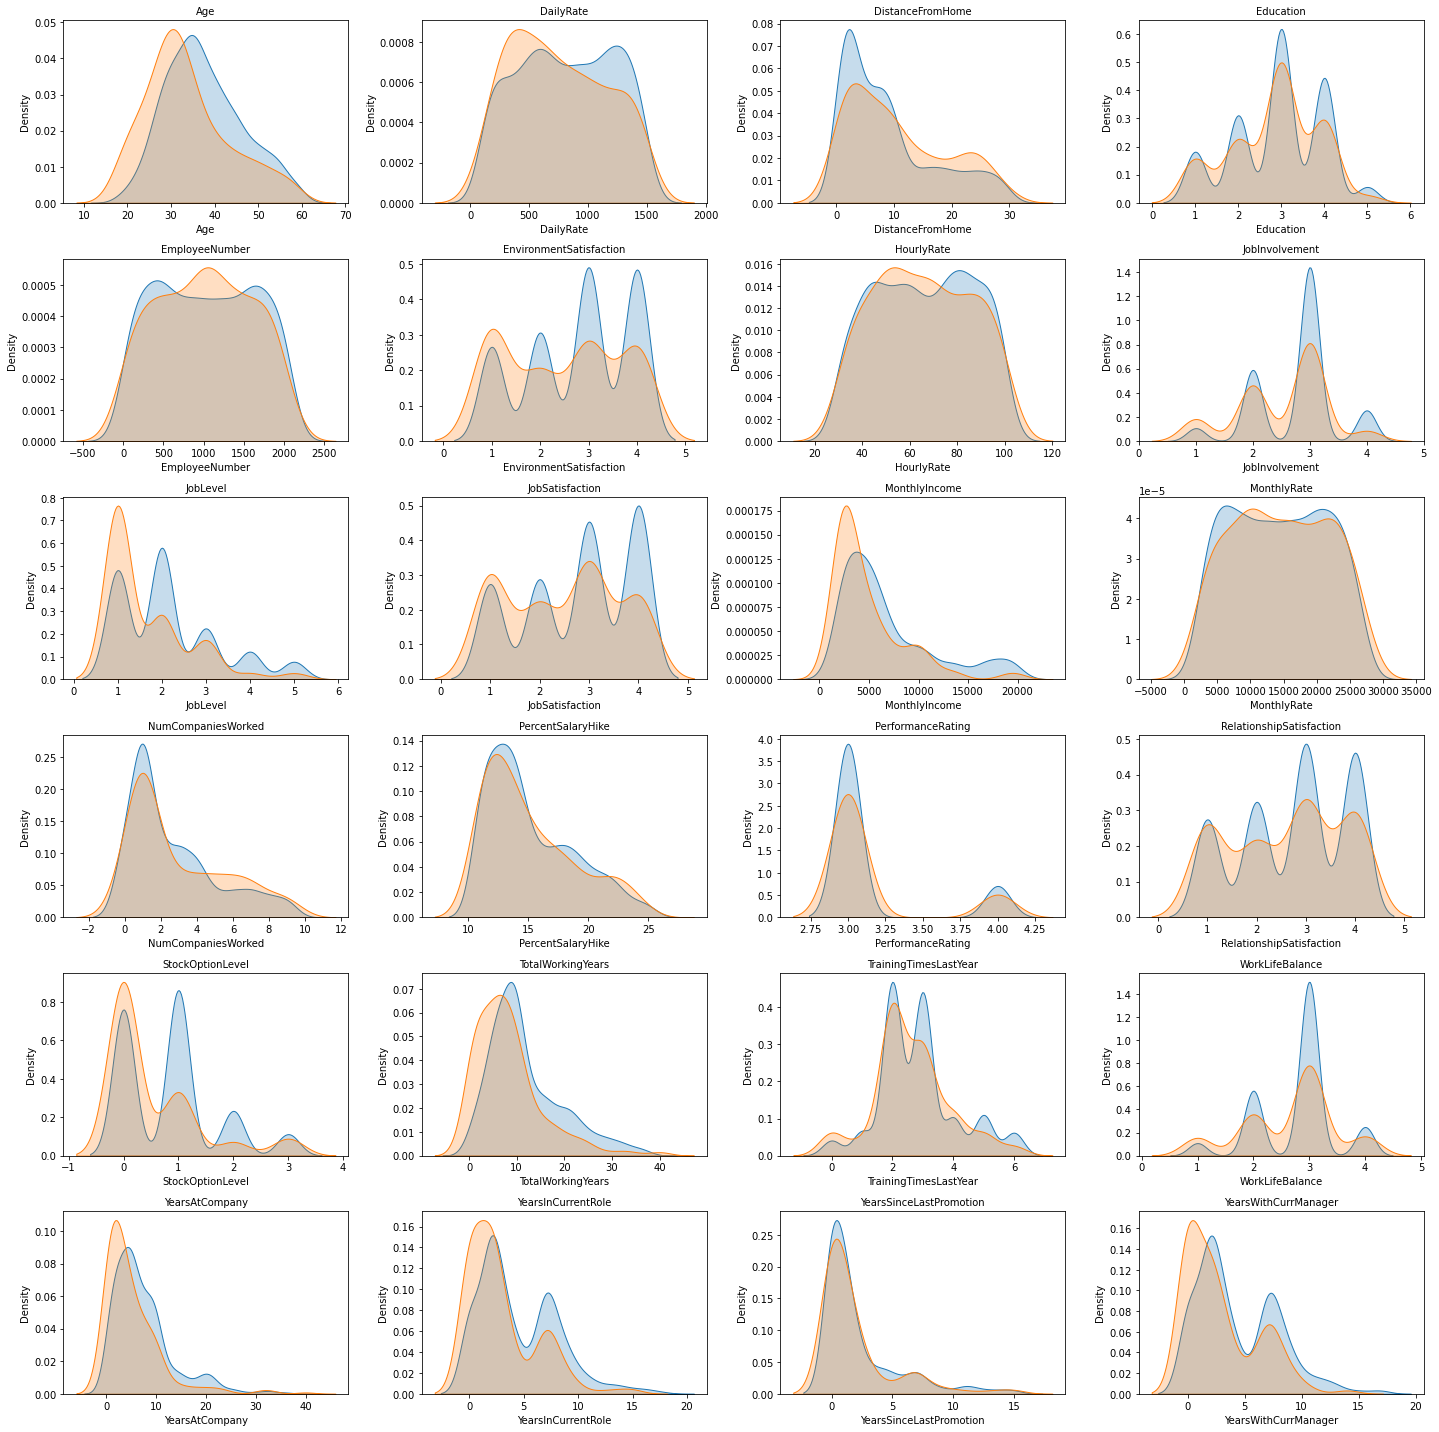

In [11]:
num_plots = len(df2)
df_class_0 = df[df.Attrition_targ == 0]
df_class_1 = df[df.Attrition_targ == 1]

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in df2:
    idx += 1
    plt.subplot(6, 4, idx)
    sns.kdeplot(df_class_0[col], label="Attrition", shade=True)
    sns.kdeplot(df_class_1[col], label="No Attrition", shade=True)
    plt.title(col, fontsize=10)
plt.savefig('dist_en.png')
plt.tight_layout()

### Key Insights from the Visualizations

Yellow chart displays employees with attrition. 
Blue chart displays employees without attrition

- Based on the age visual, we can tell that the younger population is more likely to attrition
- The further someone lives from their job, the more likely they are to attrition
- 


### Distribution of Attrition

[]

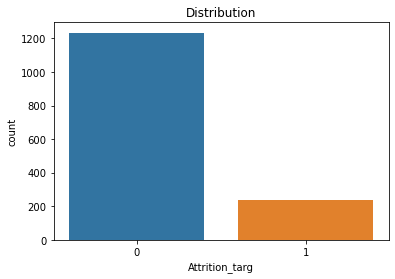

In [12]:
fig, ax = plt.subplots()
sns.countplot('Attrition_targ', data=df, ax=ax)
ax.set_title('Distribution')
plt.savefig('imbalanced_dist.png')
plt.plot()

### Data Exploration Summary 

- Roughly 16% of employees working at this company display attrition
- Several key features affect whether an employee has a higher likelihood of attritioning

## Machine Learning Preperation

As we look to fit our data to a Machine Learning model, we must do a few preprocessing steps.

- Transform our categorical variables from a string variable into an numerical variable
- Transform our numerical variables by using MinMaxScaler

### Make a copy of our dataframe


In [13]:
df_ml = df.copy()

### Drop Unnecessary Columns


In [14]:
df_ml.drop(['Attrition', 'Over18'], axis=1, inplace=True)

df_ml.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_targ
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2,0


### Convert Categorical Variables

Transform the categorical variables using Label Encoder

In [15]:
# instantiating the Label Encoder
le = LabelEncoder()

# encoding categorical features
df_ml['BusinessTravel'] = le.fit_transform(df_ml['BusinessTravel'])
df_ml['Department'] = le.fit_transform(df_ml['Department'])
df_ml['EducationField'] = le.fit_transform(df_ml['EducationField'])
df_ml['Gender'] = le.fit_transform(df_ml['Gender'])
df_ml['JobRole'] = le.fit_transform(df_ml['JobRole'])
df_ml['MaritalStatus'] = le.fit_transform(df_ml['MaritalStatus'])
df_ml['OverTime'] = le.fit_transform(df_ml['OverTime'])

# checking the result
df_ml.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_targ
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0


### Convert Numerical Variables

Transform the numerical variables using MinMaxScaler

In [16]:

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

df_ml[['Age']] = scaler.fit_transform(df_ml[['Age']])
df_ml[['DailyRate']] = scaler.fit_transform(df_ml[['DailyRate']])
df_ml[['EmployeeCount']] = scaler.fit_transform(df_ml[['EmployeeCount']])
df_ml[['EmployeeNumber']] = scaler.fit_transform(df_ml[['EmployeeNumber']])
df_ml[['HourlyRate']] = scaler.fit_transform(df_ml[['HourlyRate']])
df_ml[['MonthlyIncome']] = scaler.fit_transform(df_ml[['MonthlyIncome']])
df_ml[['MonthlyRate']] = scaler.fit_transform(df_ml[['MonthlyRate']])
df_ml[['NumCompaniesWorked']] = scaler.fit_transform(df_ml[['NumCompaniesWorked']])
df_ml[['PercentSalaryHike']] = scaler.fit_transform(df_ml[['PercentSalaryHike']])
df_ml[['StandardHours']] = scaler.fit_transform(df_ml[['StandardHours']])
df_ml[['TotalWorkingYears']] = scaler.fit_transform(df_ml[['TotalWorkingYears']])
df_ml[['TrainingTimesLastYear']] = scaler.fit_transform(df_ml[['TrainingTimesLastYear']])
df_ml[['YearsAtCompany']] = scaler.fit_transform(df_ml[['YearsAtCompany']])
df_ml[['YearsInCurrentRole']] = scaler.fit_transform(df_ml[['YearsInCurrentRole']])
df_ml[['YearsSinceLastPromotion']] = scaler.fit_transform(df_ml[['YearsSinceLastPromotion']])
df_ml[['YearsWithCurrManager']] = scaler.fit_transform(df_ml[['YearsWithCurrManager']])

# checking results
df_ml.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_targ
0,0.547619,2,0.715820,2,1,2,1,0.0,0.000000,2,0,0.914286,3,2,7,4,2,0.262454,0.698053,0.888889,1,0.000000,3,1,0.0,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118,1
1,0.738095,1,0.126700,1,8,1,1,0.0,0.000484,3,1,0.442857,2,2,6,2,1,0.217009,0.916001,0.111111,0,0.857143,4,4,0.0,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765,0
2,0.452381,2,0.909807,1,2,2,4,0.0,0.001451,4,1,0.885714,2,1,2,3,2,0.056925,0.012126,0.666667,1,0.285714,3,2,0.0,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000,1
3,0.357143,1,0.923407,1,3,4,1,0.0,0.001935,4,0,0.371429,3,1,6,3,1,0.100053,0.845814,0.111111,1,0.000000,3,3,0.0,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000,0
4,0.214286,2,0.350036,1,2,1,3,0.0,0.002903,1,1,0.142857,3,1,2,2,1,0.129489,0.583738,1.000000,0,0.071429,3,4,0.0,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647,0


### Split the Dataset into a test and a training set

This will allow us to train our model on the test set and test how our model will do with new data. 

In [17]:
# splitting the dataset
X = df_ml.drop('Attrition_targ', axis=1)
y = df['Attrition_targ']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balancing the Data

Based on the analysis above on the attrition variable (our target variable) we can tell that there is an imbalanced issue. Therefore, we need to use a RandomUnderSampler to balance out our target variable.

0    178
1    178
Name: Attrition_targ, dtype: int64


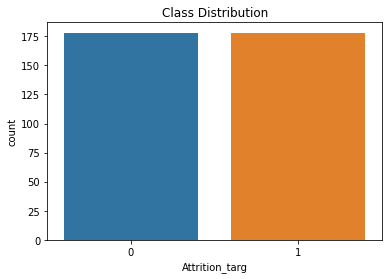

In [18]:
# applying UnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# checking class balance
print(pd.Series(y_rus).value_counts())

# plotting new class distribution
fig, ax = plt.subplots()
sns.countplot(y_rus);
ax.set_title('Class Distribution')
plt.savefig('balanced_classes.png')

## Choosing the right Machine Learning Model

For this dataset, we are trying to make predictions for an employee to attrition or not attrition within this company. For this project, it makes sense to use Logistic Regression and Random Forest

In [19]:
df_model1 = df_ml.copy()

# splitting the dataset in X and y
model1_X = df_model1.drop('Attrition_targ', axis=1)
model1_y = df_model1['Attrition_targ']

# splitting the dataset
model1_X_train, model1_X_test, model1_y_train, model1_y_test = train_test_split(model1_X, model1_y, stratify=y, shuffle=True)

In [20]:
# instantiating and training a Logistic Regression Model
np.random.seed(2)
model1 = LogisticRegression()
model1.fit(model1_X_train, model1_y_train)

# making predictions
model1_y_pred = model1.predict(model1_X_test)
model1_y_proba = model1.predict_proba(model1_X_test)

Classification Report:
               precision    recall  f1-score   support

           0     0.8853    0.9741    0.9276       309
           1     0.7143    0.3390    0.4598        59

    accuracy                         0.8723       368
   macro avg     0.7998    0.6565    0.6937       368
weighted avg     0.8579    0.8723    0.8526       368

Accuracy: 0.8723

AUC: 0.6565



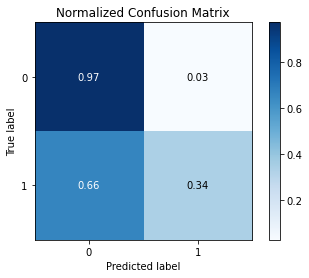

In [21]:
# plotting a confusion matrix
skplt.metrics.plot_confusion_matrix(model1_y_test, model1_y_pred, normalize=True)

# printing a classification report
print("Classification Report:\n", classification_report(model1_y_test, model1_y_pred, digits=4))

# priting accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(model1_y_test, model1_y_pred)))

# printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(model1_y_test, model1_y_pred)))

### Analysis 

- We have an accuracy rating of 87%, but we are seeing too many false positives. 
- Our AUC is at 65.49%, which is a low.

The reasoning behind these issues could be due to the imbalancing issues with the data

### Logistic Regression with Balanced Data

In [22]:
# instantiating and training a Logistic Regression Model
np.random.seed(2)
model2 = LogisticRegression()
model2.fit(X_rus, y_rus)

# making predictions
y_pred = model2.predict(X_test)
y_proba = model2.predict_proba(X_test)

Classification Report:
               precision    recall  f1-score   support

           0     0.9184    0.7282    0.8123       309
           1     0.3171    0.6610    0.4286        59

    accuracy                         0.7174       368
   macro avg     0.6177    0.6946    0.6204       368
weighted avg     0.8220    0.7174    0.7508       368

Accuracy: 0.7174

AUC: 0.6946



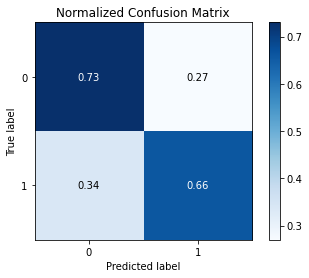

In [23]:
# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### Analysis 

We can tell the results are getting better now.

- Our AUC has gone up but our accuracy has gone down
- We still have a high false positives and high false negatives

## Random Forest 

Random Forest is a Tree-Based algorithm, that uses a large number of Decision Trees at random. After iterating over the trees, it yields the most common results of the trees.

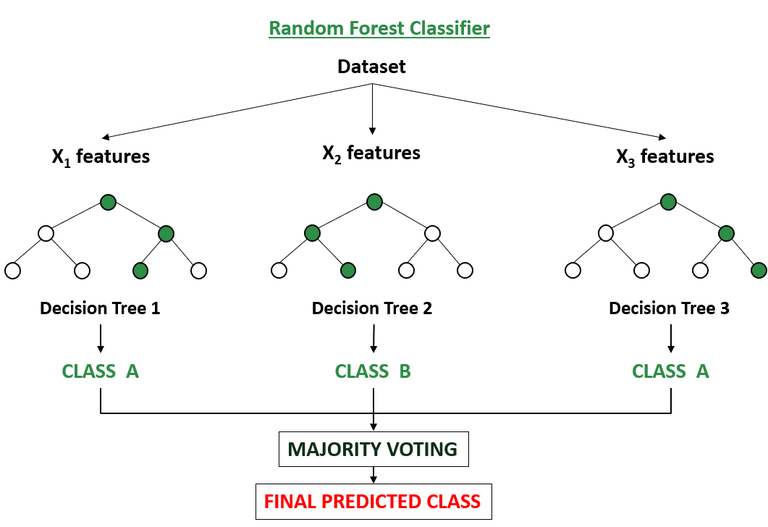

In [24]:
# creating and training the model
seed = 0
rf = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0)
rf.fit(X_rus, y_rus)

RandomForestClassifier(max_depth=3, max_features=0.3, min_samples_leaf=3,
                       n_estimators=1000, n_jobs=-1, random_state=0)

Classification Report:
               precision    recall  f1-score   support

           0     0.9300    0.7314    0.8188       309
           1     0.3360    0.7119    0.4565        59

    accuracy                         0.7283       368
   macro avg     0.6330    0.7216    0.6377       368
weighted avg     0.8348    0.7283    0.7608       368

Accuracy:	 0.7283

ROC_AUC:	 0.7216



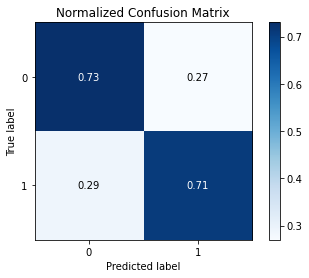

In [25]:
# making predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred, digits=4))

# Accuracy
print('Accuracy:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

### Feature Selection

We need to check which features are most important within this model.

In [27]:
# calculating feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

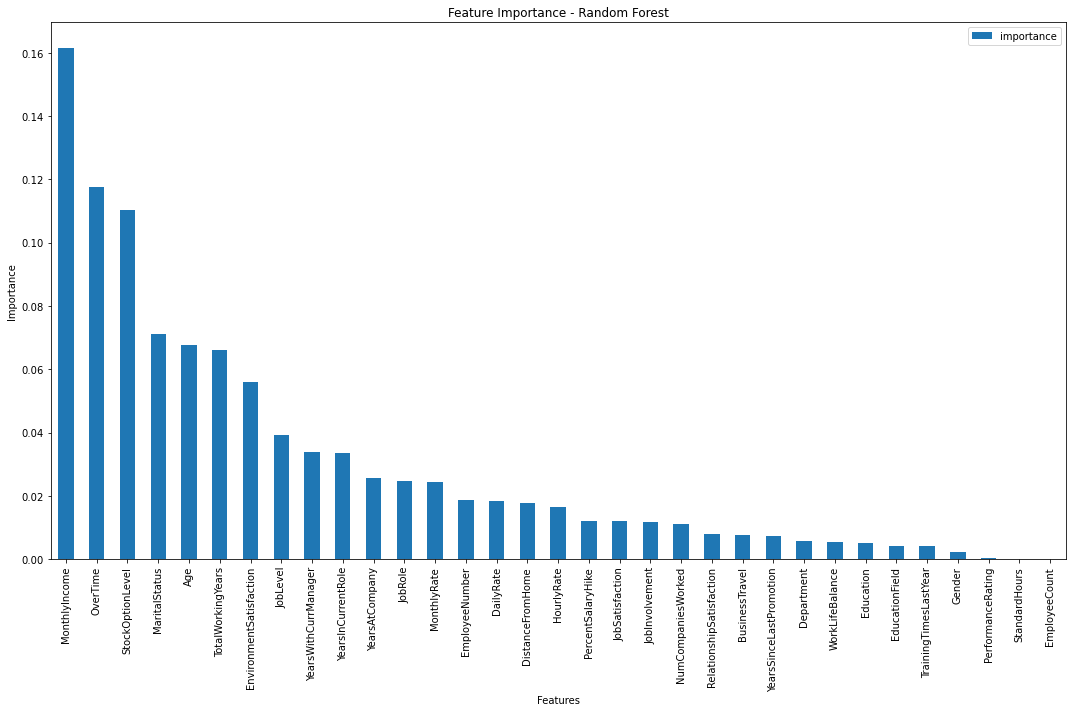

In [28]:
# plotting a bar graph to show most features by importance
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Feature Importance - Random Forest")
ax.set_xlabel("Features")
ax.set_ylabel("Importance")

plt.savefig("feat_imp.png")
plt.tight_layout()

### Random Forest Initial Thoughts

The Random Forest has performed slightly better than the Logistic Regression model.  With proper tuning, we could make both of these models perform better. 

We can tell that there are some key features that are the most important. Some key features are:

- Monthly Income
- Overtime hours worked
- Stock Option Level
- Maritial Status
- Age
- Total Working hours

We would need a deeper analysis with context of the company and their employees to know more about these key features, but its a good starting point.

# Conclusion

The goal of this project was to help a company be able to predict the likelihood of an employee to attrition or not.  As noted before, we could fine tune these models to make them perform better, but the Random Forest model ended up performing slightly better than the Logistic Regression.  We could help these models perform better with more sample data as well.